# install


In [33]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))
    !nvidia-smi

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Quadro RTX 6000
Mon Nov 28 19:43:51 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 515.65.01    Driver Version: 515.65.01    CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Quadro RTX 6000     On   | 00000000:73:00.0 Off |                  Off |
| 33%   30C    P8     4W / 260W |   6251MiB / 24576MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                     

In [34]:
!pip install transformers==4.12.2
!pip install farasapy==0.0.14
!pip install pyarabic==0.6.14
!git clone https://github.com/aub-mind/arabert
!pip install emoji==1.6.1
!pip install sentencepiece==0.1.96

fatal: destination path 'arabert' already exists and is not an empty directory.


In [35]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [36]:
import pandas as pd
import numpy as np
from typing import List
from tqdm import tqdm_notebook as tqdm
from sklearn.model_selection import train_test_split

In [37]:
pip install xlrd==1.2.0

Note: you may need to restart the kernel to use updated packages.


# dataset aug


In [38]:
ailments_data = pd.read_excel('ailments_arabic.xlsx',header = None)

ailments_data.rename(columns = {0:'phrase', 1:'prompt'}, inplace = True)
print("Missing values: ", ailments_data.isnull().sum())
ailments_data = ailments_data.drop_duplicates()

Missing values:  phrase    0
prompt    0
dtype: int64


In [39]:
ailments_data['prompt'].value_counts()

Flu           31
Anemia        28
Stress        23
Allergy       21
Fatigue       20
Bronchitis    16
Diarrhea      12
Name: prompt, dtype: int64

In [40]:
ailments_data['prompt'].value_counts()[0]

31

In [44]:
from statistics import mode
import nlpaug.augmenter.char as nac
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.sentence as nas

#print(mode(ailments_data['prompt']) ,' ',ailments_data['prompt'].value_counts()[0])
#symptoms=list(ailments_data['prompt'].unique())
max_count = ailments_data['prompt'].value_counts()[0]

aug_data = ailments_data
 
for ind in ailments_data.index:
  print(aug_data['prompt'].value_counts())
  label = aug_data['prompt'][ind]
  texts = aug_data['phrase'][ind]
  name_count = len(aug_data.loc[aug_data['prompt'] == label])
  #print(name_count,' ',max_count)
  if name_count < max_count:
    #print(label) 
    aug = naw.RandomWordAug(action="swap")

    if max_count - name_count > name_count:
       augmented_text = aug.augment(texts,n=1)
    else:
       augmented_text = aug.augment(texts,n=2)

    for string in augmented_text:
       aug_data = aug_data.append({'phrase' : string,
                      'prompt' : label} , 
                      ignore_index=True)



#manual oversample




Flu           31
Anemia        28
Stress        23
Allergy       21
Fatigue       20
Bronchitis    16
Diarrhea      12
Name: prompt, dtype: int64
Flu           31
Anemia        28
Stress        23
Allergy       23
Fatigue       20
Bronchitis    16
Diarrhea      12
Name: prompt, dtype: int64
Flu           31
Anemia        28
Allergy       25
Stress        23
Fatigue       20
Bronchitis    16
Diarrhea      12
Name: prompt, dtype: int64
Flu           31
Anemia        28
Allergy       27
Stress        23
Fatigue       20
Bronchitis    16
Diarrhea      12
Name: prompt, dtype: int64
Flu           31
Allergy       29
Anemia        28
Stress        23
Fatigue       20
Bronchitis    16
Diarrhea      12
Name: prompt, dtype: int64
Flu           31
Allergy       31
Anemia        28
Stress        23
Fatigue       20
Bronchitis    16
Diarrhea      12
Name: prompt, dtype: int64
Flu           31
Allergy       31
Anemia        28
Stress        23
Fatigue       20
Bronchitis    16
Diarrhea      12
Name:

In [45]:
print(aug_data['prompt'].value_counts())
aug_data

Fatigue       32
Bronchitis    32
Anemia        32
Diarrhea      32
Flu           31
Allergy       31
Stress        31
Name: prompt, dtype: int64


,phrase,prompt
0,أنا أعاني من صعوبة في التنفس و التكلم و البلع,Allergy
1,أنا أعاني من القيء و الاسهال و ألم في المعدة,Allergy
2,لقد أغمي علي وانا أشعر بالتوتر لأن نبضات قلبي...,Allergy
3,أبدأ أن أعطس عندما أكون بجوار زهرة,Allergy
4,يصبح جلدي أحمر على اتصال مع الملح,Allergy
...,...,...
216,أشعر بسرعة بالغضب,Stress
217,مشاكل لدي في القلب حيث دقات أن القلب سريعة,Stress
218,مشاكل لدي في القلب حيث أن القلب دقات سريعة,Stress
219,اضطرابات لدي في النوم لاسباب مختلفة,Stress


In [46]:
import nlpaug.augmenter.char as nac
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.sentence as nas

def dataAugFun(ailments_data, N):


  aug_data = ailments_data.head(0)

  texts = ailments_data['phrase']
  for ind in ailments_data.index:
      texts = ailments_data['phrase'][ind]
      label = ailments_data['prompt'][ind]
      aug = naw.RandomWordAug(action="swap")
      augmented_text = aug.augment(texts,n=N)
      
      for string in augmented_text:
        aug_data = aug_data.append({'phrase' : string,
                        'prompt' : label} , 
                        ignore_index=True)

    
  return aug_data

In [52]:
aug_datax2 = dataAugFun(aug_data , 2)
aug_datax2 = aug_datax2.drop_duplicates(subset=['phrase'])
aug_datax2.index = range(0,len(aug_datax2))
aug_datax2['prompt'].value_counts()

Allergy       59
Stress        54
Fatigue       53
Anemia        52
Flu           51
Bronchitis    51
Diarrhea      30
Name: prompt, dtype: int64

In [53]:
# This will hold all the downloaded and structred datasets
all_datasets= []
DATA_COLUMN = "text"
LABEL_COLUMN = "label"

In [54]:
class CustomDataset:
    def __init__(
        self,
        name: str,
        train: List[pd.DataFrame],
        test: List[pd.DataFrame],
        label_list: List[str],
    ):
        """Class to hold and structure datasets.

        Args:

        name (str): holds the name of the dataset so we can select it later
        train (List[pd.DataFrame]): holds training pandas dataframe with 2 columns ["text","label"]
        test (List[pd.DataFrame]): holds testing pandas dataframe with 2 columns ["text","label"]
        label_list (List[str]): holds the list  of labels
        """
        self.name = name
        self.train = train
        self.test = test
        self.label_list = label_list

In [55]:
#ailments_data = pd.read_excel('ailments_arabic.xlsx',header = None)
aug_datax2.rename(columns = {0:'phrase', 1:'prompt'}, inplace = True)


aug_datax2.columns = [DATA_COLUMN, LABEL_COLUMN]
print(aug_datax2[LABEL_COLUMN].value_counts())

label_list = list(aug_datax2[LABEL_COLUMN].unique())

#ailments_data[LABEL_COLUMN] = ailments_data[LABEL_COLUMN].astype('category')

#ailments_data[LABEL_COLUMN] = ailments_data[LABEL_COLUMN].cat.codes
aug_datax2


train, test = train_test_split(aug_datax2, test_size=0.2, random_state=42)


data = CustomDataset("ailments_data", train, test, label_list)
# # all_datasets.append(data_Hard)

Allergy       59
Stress        54
Fatigue       53
Anemia        52
Flu           51
Bronchitis    51
Diarrhea      30
Name: label, dtype: int64


# train

In [56]:
import numpy as np
import torch
import random
import matplotlib.pyplot as plt
import copy

from arabert.preprocess import ArabertPreprocessor
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, f1_score, precision_score,
                             recall_score)
from torch.utils.data import DataLoader, Dataset
from transformers import (AutoConfig, AutoModelForSequenceClassification,
                          AutoTokenizer, BertTokenizer, Trainer,
                          TrainingArguments)
from transformers.data.processors.utils import InputFeatures

In [57]:

# select a model from the huggingface modelhub https://huggingface.co/models?language=ar
model_name = 'Ammar-alhaj-ali/arabic-MARBERT-dialect-identification-city' # we are going to use the twitter AraBERT since it has emojis and dialects

#model_name = 'aubmindlab/bert-base-arabertv02-twitter' # we are going to use the twitter AraBERT since it has emojis and dialects


In [58]:
arabic_prep = ArabertPreprocessor(model_name)

data.train[DATA_COLUMN] = data.train[DATA_COLUMN].apply(lambda x: arabic_prep.preprocess(x))
data.test[DATA_COLUMN] = data.test[DATA_COLUMN].apply(lambda x: arabic_prep.preprocess(x))  

In [59]:
list(data.train[DATA_COLUMN][0:10])

['لدي مشكلة الشعر فقدان',
 'صعوبة لدي متزايدة في والقيام التركيز بالأداء الوظيفي المعتاد',
 'السعال لدي الحاد',
 'لدي من حساسية المواد الكيميائية',
 'لدي خفقان يدق قلبي بشكل أسرع أبطأ أو من المعتاد ، أو يدق بعدم انتظام',
 'محمومة أنا و رأسي يألمانني حلقي و و خشنا صوتي أصبح',
 'أبدأ أن أعطس أكون عندما زهرة بجوار',
 'أنا لا بشكل اتنفس طبيعي',
 'الصداع في الآن زيادة خاصة أنام عندما',
 '']

In [60]:
tok = AutoTokenizer.from_pretrained(model_name)

Downloading: 100%|██████████| 371/371 [00:00<00:00, 149kB/s]
Downloading: 100%|██████████| 1.05M/1.05M [00:01<00:00, 896kB/s] 
Downloading: 100%|██████████| 2.57M/2.57M [00:01<00:00, 2.00MB/s]
Downloading: 100%|██████████| 125/125 [00:00<00:00, 60.7kB/s]


Training Sentence Lengths: 


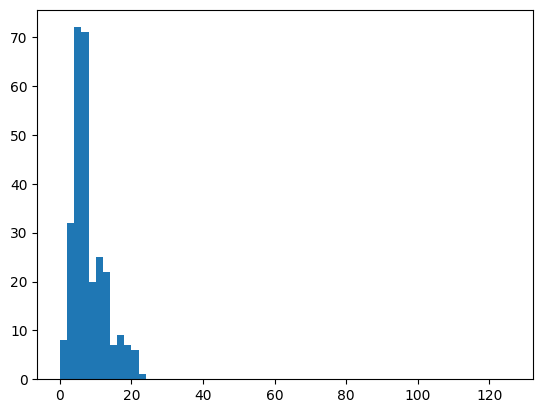

Testing Sentence Lengths: 


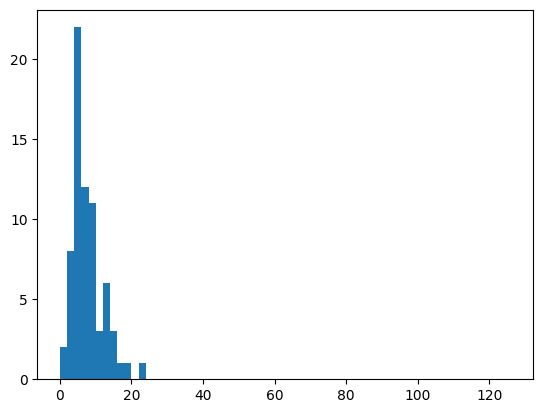

In [61]:
print("Training Sentence Lengths: ")
plt.hist([ len(tok.tokenize(sentence)) for sentence in data.train[DATA_COLUMN].to_list()],bins=range(0,128,2))
plt.show()

print("Testing Sentence Lengths: ")
plt.hist([ len(tok.tokenize(sentence)) for sentence in data.test[DATA_COLUMN].to_list()],bins=range(0,128,2))
plt.show()

In [62]:
max([ len(tok.tokenize(sentence)) for sentence in data.test[DATA_COLUMN].to_list()])
max([ len(tok.tokenize(sentence)) for sentence in data.train[DATA_COLUMN].to_list()])

max_len=25

In [63]:
data_train_tok =   [tok.tokenize(sentence) for sentence in data.train[DATA_COLUMN].to_list()]

data_test_tok = [tok.tokenize(sentence) for sentence in data.test[DATA_COLUMN].to_list()]


In [64]:
print("Truncated training sequences: ", sum([len(tok.tokenize(sentence)) > max_len for sentence in data.train[DATA_COLUMN].to_list()]))

print("Truncated testing sequences: ", sum([len(tok.tokenize(sentence)) > max_len for sentence in data.test[DATA_COLUMN].to_list()]))

Truncated training sequences:  0
Truncated testing sequences:  0


In [65]:
class ClassificationDataset(Dataset):
    def __init__(self, text, target, model_name, max_len, label_map):
      super(ClassificationDataset).__init__()
      """
      Args:
      text (List[str]): List of the training text
      target (List[str]): List of the training labels
      tokenizer_name (str): The tokenizer name (same as model_name).
      max_len (int): Maximum sentence length
      label_map (Dict[str,int]): A dictionary that maps the class labels to integer
      """
      self.text = text
      self.target = target
      self.tokenizer_name = model_name
      self.tokenizer = AutoTokenizer.from_pretrained(model_name)
      self.max_len = max_len
      self.label_map = label_map
      

    def __len__(self):
      return len(self.text)

    def __getitem__(self,item):
      text = str(self.text[item])
      text = " ".join(text.split())
        
      inputs = self.tokenizer(
          text,
          max_length=self.max_len,
          padding='max_length',
          truncation=True
      )      
      return InputFeatures(**inputs,label=label_map[self.target[item]])

In [66]:
data.train[LABEL_COLUMN].to_list()

['Stress',
 'Anemia',
 'Bronchitis',
 'Allergy',
 'Anemia',
 'Bronchitis',
 'Allergy',
 'Bronchitis',
 'Flu',
 'Diarrhea',
 'Diarrhea',
 'Fatigue',
 'Fatigue',
 'Bronchitis',
 'Allergy',
 'Anemia',
 'Stress',
 'Stress',
 'Stress',
 'Flu',
 'Diarrhea',
 'Allergy',
 'Fatigue',
 'Allergy',
 'Diarrhea',
 'Fatigue',
 'Stress',
 'Stress',
 'Stress',
 'Flu',
 'Diarrhea',
 'Allergy',
 'Fatigue',
 'Fatigue',
 'Allergy',
 'Fatigue',
 'Anemia',
 'Diarrhea',
 'Allergy',
 'Stress',
 'Bronchitis',
 'Allergy',
 'Allergy',
 'Stress',
 'Fatigue',
 'Flu',
 'Fatigue',
 'Bronchitis',
 'Allergy',
 'Fatigue',
 'Anemia',
 'Fatigue',
 'Bronchitis',
 'Bronchitis',
 'Fatigue',
 'Allergy',
 'Stress',
 'Allergy',
 'Stress',
 'Stress',
 'Allergy',
 'Fatigue',
 'Anemia',
 'Anemia',
 'Stress',
 'Flu',
 'Flu',
 'Flu',
 'Stress',
 'Fatigue',
 'Bronchitis',
 'Anemia',
 'Bronchitis',
 'Bronchitis',
 'Fatigue',
 'Allergy',
 'Bronchitis',
 'Stress',
 'Anemia',
 'Allergy',
 'Allergy',
 'Fatigue',
 'Diarrhea',
 'Anemia',
 '

In [67]:
label_map = { v:index for index, v in enumerate(data.label_list) }
print(label_map)

train_dataset = ClassificationDataset(
    data.train[DATA_COLUMN].to_list(),
    data.train[LABEL_COLUMN].to_list(),
    model_name,
    max_len,
    label_map
  )
test_dataset = ClassificationDataset(
    data.test[DATA_COLUMN].to_list(),
    data.test[LABEL_COLUMN].to_list(),
    model_name,
    max_len,
    label_map
  )

{'Allergy': 0, 'Anemia': 1, 'Bronchitis': 2, 'Diarrhea': 3, 'Fatigue': 4, 'Flu': 5, 'Stress': 6}


In [68]:
print(next(iter(train_dataset)))

InputFeatures(input_ids=[2, 5081, 5276, 5948, 12155, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], attention_mask=[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], token_type_ids=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], label=6)


In [69]:
len(label_map)

7

In [70]:
def model_init():
    return AutoModelForSequenceClassification.from_pretrained(model_name, return_dict=True, num_labels=len(label_map), ignore_mismatched_sizes=True)

In [71]:
def compute_metrics(p): #p should be of type EvalPrediction
  preds = np.argmax(p.predictions, axis=1)
  assert len(preds) == len(p.label_ids)
  #print(classification_report(p.label_ids,preds))
  #print(confusion_matrix(p.label_ids,preds))
  macro_f1 = f1_score(p.label_ids,preds,average='macro')
  #macro_precision = precision_score(p.label_ids,preds,average='macro')
  #macro_recall = recall_score(p.label_ids,preds,average='macro')
  acc = accuracy_score(p.label_ids,preds)
  return {       
      'macro_f1' : macro_f1,
      'accuracy': acc
  }

In [72]:
def set_seed(seed=42):
  random.seed(seed)
  np.random.seed(seed)
  torch.manual_seed(seed)
  torch.cuda.manual_seed(seed)
  torch.cuda.manual_seed_all(seed)
  torch.backends.cudnn.deterministic=True
  torch.backends.cudnn.benchmark = False

In [73]:
training_args = TrainingArguments( 
    output_dir= "./train",    
    adam_epsilon = 1e-8,
    learning_rate = 1e-5,
    fp16 = False, # enable this when using V100 or T4 GPU
    per_device_train_batch_size = 16, # up to 64 on 16GB with max len of 128
    per_device_eval_batch_size = 128,
    gradient_accumulation_steps = 1, # use this to scale batch size without needing more memory
    num_train_epochs= 25,
    warmup_ratio = 0,
    do_eval = True,
    evaluation_strategy = 'epoch',
    save_strategy = 'epoch',
    logging_strategy = 'epoch',
    load_best_model_at_end = True, # this allows to automatically get the best model at the end based on whatever metric we want
    metric_for_best_model = 'macro_f1',
    greater_is_better = True,
    seed = 25
  )

set_seed(training_args.seed)

In [74]:
train_dataset[0]

InputFeatures(input_ids=[2, 5081, 5276, 5948, 12155, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], attention_mask=[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], token_type_ids=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], label=6)

In [75]:
trainer = Trainer(
    model = model_init(),
    args = training_args,
    train_dataset = train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)

Downloading: 100%|██████████| 1.87k/1.87k [00:00<00:00, 557kB/s]
Downloading: 100%|██████████| 621M/621M [00:38<00:00, 16.9MB/s]   
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at Ammar-alhaj-ali/arabic-MARBERT-dialect-identification-city and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([26, 768]) in the checkpoint and torch.Size([7, 768]) in the model instantiated
- classifier.bias: found shape torch.Size([26]) in the checkpoint and torch.Size([7]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [76]:
#start the training
trainer.train()

***** Running training *****
  Num examples = 280
  Num Epochs = 25
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 450


Epoch,Training Loss,Validation Loss,Macro F1,Accuracy
1,1.903600,1.810983,0.262591,0.314286
2,1.662400,1.659717,0.400635,0.442857
3,1.441900,1.522168,0.517209,0.528571
4,1.184600,1.335212,0.641362,0.657143
5,0.962400,1.198911,0.655850,0.671429
6,0.755900,0.986388,0.749021,0.771429
7,0.575500,0.842429,0.787133,0.814286
8,0.420400,0.749489,0.774941,0.800000
9,0.307100,0.662406,0.840719,0.857143
10,0.219800,0.612907,0.853746,0.871429


***** Running Evaluation *****
  Num examples = 70
  Batch size = 128
Saving model checkpoint to ./train/checkpoint-18
Configuration saved in ./train/checkpoint-18/config.json
Model weights saved in ./train/checkpoint-18/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 70
  Batch size = 128
Saving model checkpoint to ./train/checkpoint-36
Configuration saved in ./train/checkpoint-36/config.json
Model weights saved in ./train/checkpoint-36/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 70
  Batch size = 128
Saving model checkpoint to ./train/checkpoint-54
Configuration saved in ./train/checkpoint-54/config.json
Model weights saved in ./train/checkpoint-54/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 70
  Batch size = 128
Saving model checkpoint to ./train/checkpoint-72
Configuration saved in ./train/checkpoint-72/config.json
Model weights saved in ./train/checkpoint-72/pytorch_model.bin
***** Running Evaluation *****
  Num example

TrainOutput(global_step=450, training_loss=0.4097731092903349, metrics={'train_runtime': 235.0265, 'train_samples_per_second': 29.784, 'train_steps_per_second': 1.915, 'total_flos': 89934573750000.0, 'train_loss': 0.4097731092903349, 'epoch': 25.0})

In [77]:
model_init()

loading configuration file https://huggingface.co/Ammar-alhaj-ali/arabic-MARBERT-dialect-identification-city/resolve/main/config.json from cache at /home/adham.ibrahim/.cache/huggingface/transformers/91e8d6169e360dbb82e1011844a0a4e328c9a371275c4145f4ff7154613af8ac.337289b35831d3b14be2112c7bbcc35339dc0f4265ff61051cf4098d1711d799
Model config BertConfig {
  "_name_or_path": "UBC-NLP/MARBERT",
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "directionality": "bidi",
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4",
    "5": "LABEL_5",
    "6": "LABEL_6"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2,
    "LABEL_3": 3,
    "LABEL_4": 4,
    "LABEL_5

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(100000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elemen

In [78]:
# do kfold on the training. Check the perfomance on the test set
kfold_dataset = data.train
# do kfold on all the dataset. Here we will not have any dataset to checl final performance on (this is used mainly in competitions)
# kfold_dataset = pd.concat([selected_dataset.train,selected_dataset.test])
kfold_dataset.reset_index(inplace=True,drop=True)

In [79]:
# this is used later
inv_label_map = { v:k for k, v in label_map.items()}

In [80]:
from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=123
  )

In [82]:
all_results = []
fold_best_f1 = 0
best_fold = None
for fold_num , (train, dev) in enumerate(kf.split(kfold_dataset,kfold_dataset['label'])):
  print("**************************Starting Fold Num: ", fold_num," **************************")
  
  train_dataset = ClassificationDataset(list(kfold_dataset[DATA_COLUMN][train]),
                              list(kfold_dataset[LABEL_COLUMN][train]),
                              model_name,
                              max_len,
                              label_map)
  
  val_dataset = ClassificationDataset(list(kfold_dataset[DATA_COLUMN][dev]),
                              list(kfold_dataset[LABEL_COLUMN][dev]),
                              model_name,
                              max_len,
                              label_map)
  
  training_args = TrainingArguments( 
    output_dir= f"./train_{fold_num}",    
    adam_epsilon = 1e-8,
    learning_rate = 1e-5,
    fp16 = False,
    per_device_train_batch_size = 64,
    per_device_eval_batch_size = 128,
    gradient_accumulation_steps = 2,
    num_train_epochs= 25,
    warmup_ratio = 0,
    do_eval = True,
    evaluation_strategy = 'epoch',
    save_strategy = 'epoch',
    load_best_model_at_end = True,
    metric_for_best_model = 'macro_f1',
    greater_is_better = True,
    seed = 123
  )

  set_seed(training_args.seed)

  trainer = Trainer(
    model = model_init(),
    args = training_args,
    train_dataset = train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
  )
  trainer.model.config.label2id = label_map
  trainer.model.config.id2label = inv_label_map

  trainer.train()

  results = trainer.evaluate()
  all_results.append(results)
  print(results)

  trainer.save_model(f"./train_{fold_num}/best_model")
  val_dataset.tokenizer.save_pretrained(f"./train_{fold_num}/best_model")

  # delete the rest of the checkpoints
  !rm -rf f"./train_{fold_num}/checkpoint-*" 
  
  if results['eval_macro_f1'] > fold_best_f1:
    print('**************************New Best Model Found!**************************')
    fold_best_f1 = results['eval_macro_f1']
    best_fold = fold_num

**************************Starting Fold Num:  0  **************************


loading file https://huggingface.co/Ammar-alhaj-ali/arabic-MARBERT-dialect-identification-city/resolve/main/vocab.txt from cache at /home/adham.ibrahim/.cache/huggingface/transformers/69290462745b1865dac00fbd2b0279a10cba09c40f032fc91e779b222fe7fe97.9985cd6ca030442c4f68221160381b229fee63902f75a8f43e14e78007536585
loading file https://huggingface.co/Ammar-alhaj-ali/arabic-MARBERT-dialect-identification-city/resolve/main/tokenizer.json from cache at /home/adham.ibrahim/.cache/huggingface/transformers/e8a327f7653443a2e68232e7ace452fcbc0b32feca96916c7417fc10ec187de8.c45a0acbaab52f14cb775dbc8f96269b8448af78e79b7ffe7ea1aee9af1c3d30
loading file https://huggingface.co/Ammar-alhaj-ali/arabic-MARBERT-dialect-identification-city/resolve/main/added_tokens.json from cache at None
loading file https://huggingface.co/Ammar-alhaj-ali/arabic-MARBERT-dialect-identification-city/resolve/main/special_tokens_map.json from cache at /home/adham.ibrahim/.cache/huggingface/transformers/12738ae0a8fd10ad2711e025

Epoch,Training Loss,Validation Loss,Macro F1,Accuracy
1,No log,1.886271,0.222815,0.285714
2,No log,1.850539,0.266947,0.339286
3,No log,1.821879,0.323980,0.375000
4,No log,1.793157,0.324770,0.375000
5,No log,1.762814,0.349765,0.410714
6,No log,1.732671,0.335497,0.410714
7,No log,1.704571,0.430830,0.464286
8,No log,1.678142,0.442918,0.482143
9,No log,1.653147,0.442918,0.482143
10,No log,1.628049,0.453552,0.500000


***** Running Evaluation *****
  Num examples = 56
  Batch size = 128
Saving model checkpoint to ./train_0/checkpoint-2
Configuration saved in ./train_0/checkpoint-2/config.json
Model weights saved in ./train_0/checkpoint-2/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 56
  Batch size = 128
Saving model checkpoint to ./train_0/checkpoint-4
Configuration saved in ./train_0/checkpoint-4/config.json
Model weights saved in ./train_0/checkpoint-4/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 56
  Batch size = 128
Saving model checkpoint to ./train_0/checkpoint-6
Configuration saved in ./train_0/checkpoint-6/config.json
Model weights saved in ./train_0/checkpoint-6/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 56
  Batch size = 128
Saving model checkpoint to ./train_0/checkpoint-8
Configuration saved in ./train_0/checkpoint-8/config.json
Model weights saved in ./train_0/checkpoint-8/pytorch_model.bin
***** Running Evaluation *****
 

Saving model checkpoint to ./train_0/best_model
Configuration saved in ./train_0/best_model/config.json


{'eval_loss': 1.4196548461914062, 'eval_macro_f1': 0.5667449543920132, 'eval_accuracy': 0.5892857142857143, 'eval_runtime': 0.0412, 'eval_samples_per_second': 1359.021, 'eval_steps_per_second': 24.268, 'epoch': 25.0}


Model weights saved in ./train_0/best_model/pytorch_model.bin
tokenizer config file saved in ./train_0/best_model/tokenizer_config.json
Special tokens file saved in ./train_0/best_model/special_tokens_map.json


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
**************************New Best Model Found!**************************
**************************Starting Fold Num:  1  **************************


loading file https://huggingface.co/Ammar-alhaj-ali/arabic-MARBERT-dialect-identification-city/resolve/main/vocab.txt from cache at /home/adham.ibrahim/.cache/huggingface/transformers/69290462745b1865dac00fbd2b0279a10cba09c40f032fc91e779b222fe7fe97.9985cd6ca030442c4f68221160381b229fee63902f75a8f43e14e78007536585
loading file https://huggingface.co/Ammar-alhaj-ali/arabic-MARBERT-dialect-identification-city/resolve/main/tokenizer.json from cache at /home/adham.ibrahim/.cache/huggingface/transformers/e8a327f7653443a2e68232e7ace452fcbc0b32feca96916c7417fc10ec187de8.c45a0acbaab52f14cb775dbc8f96269b8448af78e79b7ffe7ea1aee9af1c3d30
loading file https://huggingface.co/Ammar-alhaj-ali/arabic-MARBERT-dialect-identification-city/resolve/main/added_tokens.json from cache at None
loading file https://huggingface.co/Ammar-alhaj-ali/arabic-MARBERT-dialect-identification-city/resolve/main/special_tokens_map.json from cache at /home/adham.ibrahim/.cache/huggingface/transformers/12738ae0a8fd10ad2711e025

Epoch,Training Loss,Validation Loss,Macro F1,Accuracy
1,No log,1.898364,0.180280,0.214286
2,No log,1.851514,0.327080,0.375000
3,No log,1.816182,0.377414,0.428571
4,No log,1.784878,0.358576,0.410714
5,No log,1.754418,0.333869,0.392857
6,No log,1.727262,0.334152,0.392857
7,No log,1.701669,0.334721,0.392857
8,No log,1.675863,0.369774,0.428571
9,No log,1.651261,0.358910,0.410714
10,No log,1.627971,0.375173,0.428571


***** Running Evaluation *****
  Num examples = 56
  Batch size = 128
Saving model checkpoint to ./train_1/checkpoint-2
Configuration saved in ./train_1/checkpoint-2/config.json
Model weights saved in ./train_1/checkpoint-2/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 56
  Batch size = 128
Saving model checkpoint to ./train_1/checkpoint-4
Configuration saved in ./train_1/checkpoint-4/config.json
Model weights saved in ./train_1/checkpoint-4/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 56
  Batch size = 128
Saving model checkpoint to ./train_1/checkpoint-6
Configuration saved in ./train_1/checkpoint-6/config.json
Model weights saved in ./train_1/checkpoint-6/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 56
  Batch size = 128
Saving model checkpoint to ./train_1/checkpoint-8
Configuration saved in ./train_1/checkpoint-8/config.json
Model weights saved in ./train_1/checkpoint-8/pytorch_model.bin
***** Running Evaluation *****
 

Saving model checkpoint to ./train_1/best_model
Configuration saved in ./train_1/best_model/config.json


{'eval_loss': 1.4714316129684448, 'eval_macro_f1': 0.5550858665144379, 'eval_accuracy': 0.5535714285714286, 'eval_runtime': 0.0417, 'eval_samples_per_second': 1344.359, 'eval_steps_per_second': 24.006, 'epoch': 25.0}


Model weights saved in ./train_1/best_model/pytorch_model.bin
tokenizer config file saved in ./train_1/best_model/tokenizer_config.json
Special tokens file saved in ./train_1/best_model/special_tokens_map.json


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
**************************Starting Fold Num:  2  **************************


loading file https://huggingface.co/Ammar-alhaj-ali/arabic-MARBERT-dialect-identification-city/resolve/main/vocab.txt from cache at /home/adham.ibrahim/.cache/huggingface/transformers/69290462745b1865dac00fbd2b0279a10cba09c40f032fc91e779b222fe7fe97.9985cd6ca030442c4f68221160381b229fee63902f75a8f43e14e78007536585
loading file https://huggingface.co/Ammar-alhaj-ali/arabic-MARBERT-dialect-identification-city/resolve/main/tokenizer.json from cache at /home/adham.ibrahim/.cache/huggingface/transformers/e8a327f7653443a2e68232e7ace452fcbc0b32feca96916c7417fc10ec187de8.c45a0acbaab52f14cb775dbc8f96269b8448af78e79b7ffe7ea1aee9af1c3d30
loading file https://huggingface.co/Ammar-alhaj-ali/arabic-MARBERT-dialect-identification-city/resolve/main/added_tokens.json from cache at None
loading file https://huggingface.co/Ammar-alhaj-ali/arabic-MARBERT-dialect-identification-city/resolve/main/special_tokens_map.json from cache at /home/adham.ibrahim/.cache/huggingface/transformers/12738ae0a8fd10ad2711e025

Epoch,Training Loss,Validation Loss,Macro F1,Accuracy
1,No log,1.897425,0.166402,0.214286
2,No log,1.847877,0.247514,0.321429
3,No log,1.805984,0.274754,0.357143
4,No log,1.767226,0.298864,0.375000
5,No log,1.732266,0.368082,0.410714
6,No log,1.699168,0.386239,0.428571
7,No log,1.666904,0.445767,0.482143
8,No log,1.634268,0.474613,0.517857
9,No log,1.602929,0.523204,0.571429
10,No log,1.572641,0.556236,0.607143


***** Running Evaluation *****
  Num examples = 56
  Batch size = 128
Saving model checkpoint to ./train_2/checkpoint-2
Configuration saved in ./train_2/checkpoint-2/config.json
Model weights saved in ./train_2/checkpoint-2/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 56
  Batch size = 128
Saving model checkpoint to ./train_2/checkpoint-4
Configuration saved in ./train_2/checkpoint-4/config.json
Model weights saved in ./train_2/checkpoint-4/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 56
  Batch size = 128
Saving model checkpoint to ./train_2/checkpoint-6
Configuration saved in ./train_2/checkpoint-6/config.json
Model weights saved in ./train_2/checkpoint-6/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 56
  Batch size = 128
Saving model checkpoint to ./train_2/checkpoint-8
Configuration saved in ./train_2/checkpoint-8/config.json
Model weights saved in ./train_2/checkpoint-8/pytorch_model.bin
***** Running Evaluation *****
 

Saving model checkpoint to ./train_2/best_model
Configuration saved in ./train_2/best_model/config.json


{'eval_loss': 1.3638542890548706, 'eval_macro_f1': 0.6852536561183179, 'eval_accuracy': 0.6964285714285714, 'eval_runtime': 0.0414, 'eval_samples_per_second': 1353.828, 'eval_steps_per_second': 24.175, 'epoch': 25.0}


Model weights saved in ./train_2/best_model/pytorch_model.bin
tokenizer config file saved in ./train_2/best_model/tokenizer_config.json
Special tokens file saved in ./train_2/best_model/special_tokens_map.json


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
**************************New Best Model Found!**************************
**************************Starting Fold Num:  3  **************************


loading file https://huggingface.co/Ammar-alhaj-ali/arabic-MARBERT-dialect-identification-city/resolve/main/vocab.txt from cache at /home/adham.ibrahim/.cache/huggingface/transformers/69290462745b1865dac00fbd2b0279a10cba09c40f032fc91e779b222fe7fe97.9985cd6ca030442c4f68221160381b229fee63902f75a8f43e14e78007536585
loading file https://huggingface.co/Ammar-alhaj-ali/arabic-MARBERT-dialect-identification-city/resolve/main/tokenizer.json from cache at /home/adham.ibrahim/.cache/huggingface/transformers/e8a327f7653443a2e68232e7ace452fcbc0b32feca96916c7417fc10ec187de8.c45a0acbaab52f14cb775dbc8f96269b8448af78e79b7ffe7ea1aee9af1c3d30
loading file https://huggingface.co/Ammar-alhaj-ali/arabic-MARBERT-dialect-identification-city/resolve/main/added_tokens.json from cache at None
loading file https://huggingface.co/Ammar-alhaj-ali/arabic-MARBERT-dialect-identification-city/resolve/main/special_tokens_map.json from cache at /home/adham.ibrahim/.cache/huggingface/transformers/12738ae0a8fd10ad2711e025

Epoch,Training Loss,Validation Loss,Macro F1,Accuracy
1,No log,1.934487,0.136813,0.196429
2,No log,1.885321,0.203968,0.267857
3,No log,1.848101,0.259576,0.321429
4,No log,1.816495,0.271525,0.339286
5,No log,1.783722,0.250935,0.321429
6,No log,1.752059,0.324746,0.392857
7,No log,1.721693,0.422731,0.446429
8,No log,1.694314,0.443402,0.464286
9,No log,1.668792,0.443402,0.464286
10,No log,1.646146,0.443402,0.464286


***** Running Evaluation *****
  Num examples = 56
  Batch size = 128
Saving model checkpoint to ./train_3/checkpoint-2
Configuration saved in ./train_3/checkpoint-2/config.json
Model weights saved in ./train_3/checkpoint-2/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 56
  Batch size = 128
Saving model checkpoint to ./train_3/checkpoint-4
Configuration saved in ./train_3/checkpoint-4/config.json
Model weights saved in ./train_3/checkpoint-4/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 56
  Batch size = 128
Saving model checkpoint to ./train_3/checkpoint-6
Configuration saved in ./train_3/checkpoint-6/config.json
Model weights saved in ./train_3/checkpoint-6/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 56
  Batch size = 128
Saving model checkpoint to ./train_3/checkpoint-8
Configuration saved in ./train_3/checkpoint-8/config.json
Model weights saved in ./train_3/checkpoint-8/pytorch_model.bin
***** Running Evaluation *****
 

Saving model checkpoint to ./train_3/best_model
Configuration saved in ./train_3/best_model/config.json


{'eval_loss': 1.5471545457839966, 'eval_macro_f1': 0.4896312279852652, 'eval_accuracy': 0.5178571428571429, 'eval_runtime': 0.0427, 'eval_samples_per_second': 1311.891, 'eval_steps_per_second': 23.427, 'epoch': 25.0}


Model weights saved in ./train_3/best_model/pytorch_model.bin
tokenizer config file saved in ./train_3/best_model/tokenizer_config.json
Special tokens file saved in ./train_3/best_model/special_tokens_map.json


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
**************************Starting Fold Num:  4  **************************


loading file https://huggingface.co/Ammar-alhaj-ali/arabic-MARBERT-dialect-identification-city/resolve/main/vocab.txt from cache at /home/adham.ibrahim/.cache/huggingface/transformers/69290462745b1865dac00fbd2b0279a10cba09c40f032fc91e779b222fe7fe97.9985cd6ca030442c4f68221160381b229fee63902f75a8f43e14e78007536585
loading file https://huggingface.co/Ammar-alhaj-ali/arabic-MARBERT-dialect-identification-city/resolve/main/tokenizer.json from cache at /home/adham.ibrahim/.cache/huggingface/transformers/e8a327f7653443a2e68232e7ace452fcbc0b32feca96916c7417fc10ec187de8.c45a0acbaab52f14cb775dbc8f96269b8448af78e79b7ffe7ea1aee9af1c3d30
loading file https://huggingface.co/Ammar-alhaj-ali/arabic-MARBERT-dialect-identification-city/resolve/main/added_tokens.json from cache at None
loading file https://huggingface.co/Ammar-alhaj-ali/arabic-MARBERT-dialect-identification-city/resolve/main/special_tokens_map.json from cache at /home/adham.ibrahim/.cache/huggingface/transformers/12738ae0a8fd10ad2711e025

Epoch,Training Loss,Validation Loss,Macro F1,Accuracy
1,No log,1.924954,0.136508,0.214286
2,No log,1.882935,0.216606,0.285714
3,No log,1.843272,0.213455,0.267857
4,No log,1.806839,0.243084,0.303571
5,No log,1.775320,0.282752,0.339286
6,No log,1.747831,0.321391,0.392857
7,No log,1.723259,0.382130,0.410714
8,No log,1.698345,0.384219,0.410714
9,No log,1.671684,0.432133,0.446429
10,No log,1.645114,0.432133,0.446429


***** Running Evaluation *****
  Num examples = 56
  Batch size = 128
Saving model checkpoint to ./train_4/checkpoint-2
Configuration saved in ./train_4/checkpoint-2/config.json
Model weights saved in ./train_4/checkpoint-2/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 56
  Batch size = 128
Saving model checkpoint to ./train_4/checkpoint-4
Configuration saved in ./train_4/checkpoint-4/config.json
Model weights saved in ./train_4/checkpoint-4/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 56
  Batch size = 128
Saving model checkpoint to ./train_4/checkpoint-6
Configuration saved in ./train_4/checkpoint-6/config.json
Model weights saved in ./train_4/checkpoint-6/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 56
  Batch size = 128
Saving model checkpoint to ./train_4/checkpoint-8
Configuration saved in ./train_4/checkpoint-8/config.json
Model weights saved in ./train_4/checkpoint-8/pytorch_model.bin
***** Running Evaluation *****
 

Saving model checkpoint to ./train_4/best_model
Configuration saved in ./train_4/best_model/config.json


{'eval_loss': 1.5282628536224365, 'eval_macro_f1': 0.5205297575987231, 'eval_accuracy': 0.5357142857142857, 'eval_runtime': 0.0415, 'eval_samples_per_second': 1350.24, 'eval_steps_per_second': 24.111, 'epoch': 25.0}


Model weights saved in ./train_4/best_model/pytorch_model.bin
tokenizer config file saved in ./train_4/best_model/tokenizer_config.json
Special tokens file saved in ./train_4/best_model/special_tokens_map.json


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [83]:
from statistics import mean
mean([x['eval_macro_f1'] for x in all_results])

0.5634490925217515

In [85]:
pip install more-itertools


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 411.0 kB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [86]:
from transformers import pipeline
import more_itertools

In [87]:
inv_label_map = { v:k for k, v in label_map.items()}

In [88]:
# pred_df = prediction['Text']
# pred_df = pred_df.apply(lambda x:   arabic_prep.preprocess(x))

pred_df = data.test[DATA_COLUMN]

In [95]:
cross_val_df = pd.DataFrame([])
for i in range(0,5):
  pipe = pipeline("sentiment-analysis", model=f"train_{i}/best_model", device=0, return_all_scores =True, max_length=max_len, truncation=True)
  preds = []
  for s in tqdm(more_itertools.chunked(list(pred_df), 32)): # batching for faster inference
    preds.extend(pipe(s))
  cross_val_df[f'model_{i}'] = preds

loading configuration file train_0/best_model/config.json
Model config BertConfig {
  "_name_or_path": "Ammar-alhaj-ali/arabic-MARBERT-dialect-identification-city",
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "directionality": "bidi",
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "Allergy",
    "1": "Anemia",
    "2": "Bronchitis",
    "3": "Diarrhea",
    "4": "Fatigue",
    "5": "Flu",
    "6": "Stress"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "Allergy": 0,
    "Anemia": 1,
    "Bronchitis": 2,
    "Diarrhea": 3,
    "Fatigue": 4,
    "Flu": 5,
    "Stress": 6
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "pooler_fc_size": 768,
  "pooler_num_atte

ImportError: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

In [90]:
from collections import defaultdict

final_labels = []
final_scores = []
for id, row in cross_val_df.iterrows():
  total_score = defaultdict(lambda: 0)  
  for pred in row:
    for cls in pred:
      total_score[cls['label']] += cls['score']

  avg_score = { k: v/ 5 for k, v in total_score.items()}

  final_labels.append(max(avg_score, key=avg_score.get))
  final_scores.append(avg_score[max(avg_score, key=avg_score.get)])

In [91]:
cross_val_df['preds'] = final_labels 
cross_val_df['sentiment_score'] = final_scores 

In [92]:
cross_val_df['preds'].value_counts()

Series([], Name: preds, dtype: int64)

In [93]:
print(classification_report(data.test[LABEL_COLUMN],cross_val_df['preds']))

ValueError: Found input variables with inconsistent numbers of samples: [70, 0]